In [1]:
import pandas as pd
import os

## Merging all csv files together

In [3]:
directory = r"C:\Users\Vishwajeet Yaduraj\Desktop\Project today\Sales_Data"

# List all the files in the directory
files = [file for file in os.listdir(directory)]

# Initialize an empty DataFrame to store the concatenated data
all_months = pd.DataFrame()

# Loop through each file and concatenate them
for file in files:
    file_path = os.path.join(directory, file)  # Correctly join the directory and file name
    df = pd.read_csv(file_path)
    all_months = pd.concat([all_months, df])

all_months.to_csv("all_data.csv", index = False)

Reading new generated data

In [5]:
df = pd.read_csv("all_data.csv")
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [6]:
df.shape

(186849, 6)

In [7]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
df=df.dropna(how='all')
df.shape

(186305, 6)

## Question 1: What was the best month for sale? and how much was earned that month?

In [10]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Data Cleaning 

In [12]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'].unique()

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

#### Finding 'Or' in Month column and deleting them

In [14]:
temp_df = df[df['Month']=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [15]:
df = df[df['Month']!='Or']
df['Month']= df['Month'].astype(int)

#### Task : Lets add Total sales column

In [17]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [18]:
df["Total_sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
sales_per_month = df.groupby('Month').sum()['Total_sales']
sales_per_month

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total_sales, dtype: float64

## Let's plot the sales data for better visualization

In [21]:
import matplotlib.pyplot as plt
months = range(1,13)

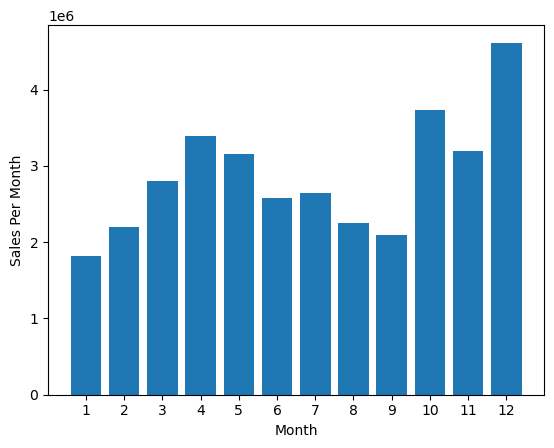

In [22]:
plt.bar(months,sales_per_month)
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sales Per Month")  # It is evident that 12th month registered highest sales
plt.show()

#### Question 2.What city has the highest sales value.

#### Task:- Make a new column for each city

In [25]:
City = []
for x in df['Purchase Address']:
    City.append(x.split(',')[1] + ', ' + x.split(',')[2].split(' ')[1])
    
df['City'] = City   

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [27]:
cities = df['City'].unique()
cities = pd.Series(cities).sort_values()
print(type(cities))

<class 'pandas.core.series.Series'>


In [28]:
sales_per_city = df.groupby('City').sum()['Total_sales']
sales_per_city

City
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Total_sales, dtype: float64

Text(0.5, 1.0, 'City wise sales records')

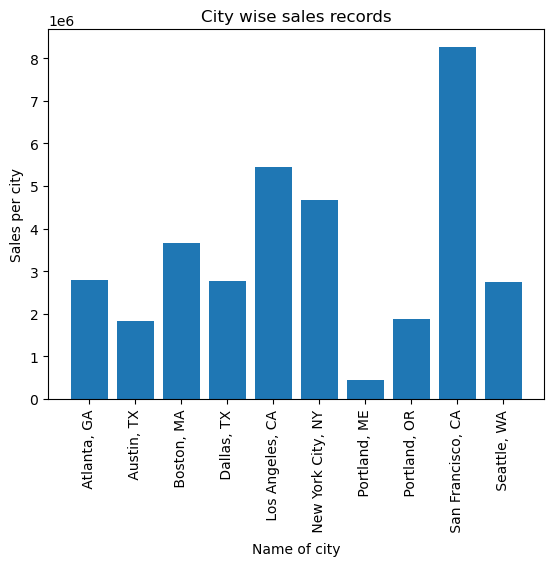

In [29]:
plt.bar(cities,sales_per_city)
plt.xticks(cities,rotation=90)
plt.xlabel("Name of city")
plt.ylabel("Sales per city")
plt.title("City wise sales records")

#### So, The city of San Francisco, CA records the highest sales of $8262203.91 and Portland, ME is below par.

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Total_sales       185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int32(2), object(5)
memory usage: 12.8+ MB


#### Formating the order date as datetime object

In [34]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_20768\3037392794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186848
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Total_sales       185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 12.8+ MB


In [35]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] =  df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [36]:
hours = pd.Series(df['Hour'].unique()).sort_values()
hour_counts = df.groupby('Hour').count()

#### From the analysis, The best time for ads would be around 11AM to 12PM and 6:30PM to 7:30PM(maybe after working hours)

Text(0, 0.5, 'Count per hour')

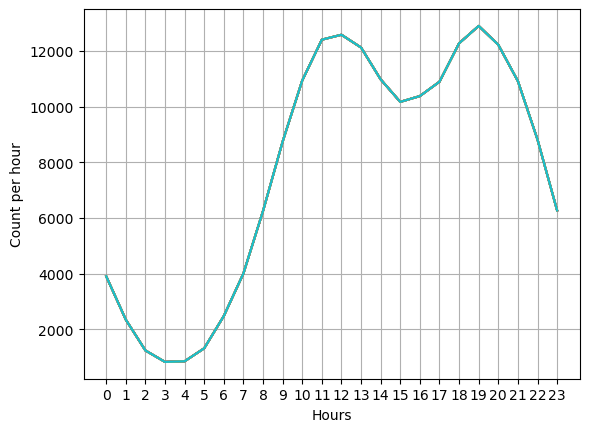

In [38]:
plt.plot(hours,hour_counts)
plt.grid()
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel('Count per hour')

#### Question 4: What products are most often sold together?

In [40]:
# Find duplicate 'order-id's
duplicate_order = df[df.duplicated('Order ID', keep=False)]
duplicate_order['Grouped'] = duplicate_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicate_order = duplicate_order[['Order ID','Grouped']].drop_duplicates()
duplicate_order.head(25)

C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_20768\3721281054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_order['Grouped'] = duplicate_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [41]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_order['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### So, 'iPhone' and 'Lightning Charging Cable' were sold together mostly, probably because those fuckers don't sell chargers in box.

#### Question 5: What product was sold the most? 

In [44]:
Products = pd.Series(df['Product'].unique()).sort_values()

In [45]:
new_grouped_data = df.drop(columns='Order Date').groupby('Product')
products_count = new_grouped_data.sum()['Quantity Ordered']

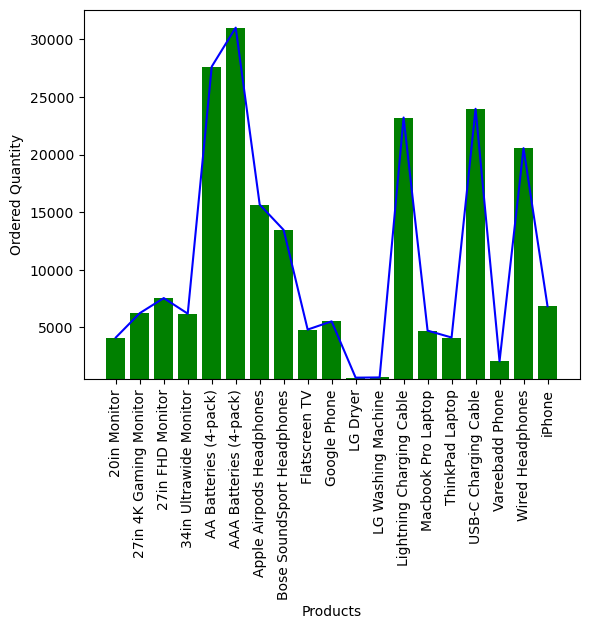

In [46]:
plt.plot(Products,products_count,color="blue")
plt.bar(Products,products_count,color="green")
plt.xticks(Products,rotation = 90)
plt.xlabel("Products")
plt.ylabel("Ordered Quantity")
plt.ylim(ymin=500)
plt.show()

#### So, we can infer that AAA Batteries are sold the most from above visualization..

#### My hypothesis is that, it is so because the product is relatively cheaper than other Products on our list.

#### Let's test our hypothesis...

In [50]:
prices = df[['Product','Price Each']].groupby('Product').mean()['Price Each']

C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_20768\235294658.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Products, rotation='vertical', size=8)
C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_20768\235294658.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


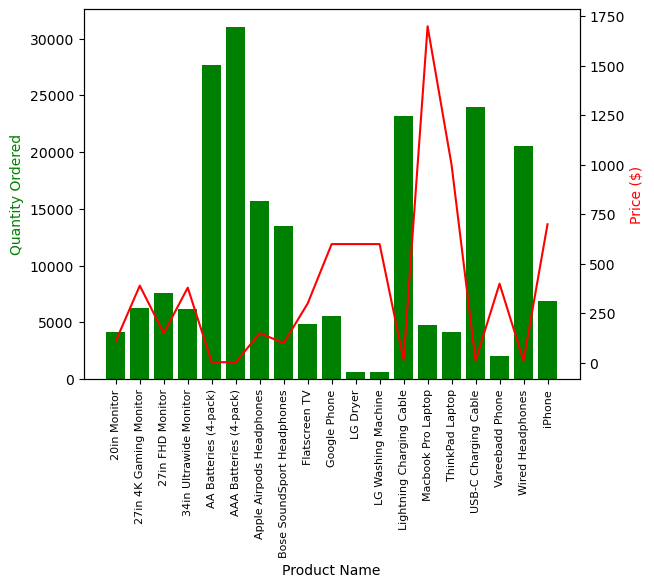

In [51]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Products,products_count, color='g')
ax2.plot(Products, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(Products, rotation='vertical', size=8)

fig.show()

#### So, To conclude our null hypothesis was absolutely correct and the AA batteries and AAA batteries are two of the
#### most cheapest products and thus ordered most frequently.

In [90]:
!git init

Initialized empty Git repository in C:/Users/Vishwajeet Yaduraj/Desktop/Project today/.git/


In [92]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Sales_Data.ipynb
	Sales_Data/
	all_data.csv

nothing added to commit but untracked files present (use "git add" to track)


In [110]:
!git remote add origin https://github.com/vishwajeet-yaduraj/Sales-Data-Analysis.git

error: remote origin already exists.


In [112]:
!git branch -M main

In [114]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.

To https://github.com/vishwajeet-yaduraj/Sales-Data-Analysis.git
 * [new branch]      main -> main


In [100]:
!git status

On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Sales_Data.ipynb
	Sales_Data/
	all_data.csv

nothing added to commit but untracked files present (use "git add" to track)


In [102]:
!git add .

In [104]:
!git status

On branch main

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .ipynb_checkpoints/Sales_Data-checkpoint.ipynb
	new file:   Sales_Data.ipynb
	new file:   Sales_Data/Sales_April_2019.csv
	new file:   Sales_Data/Sales_August_2019.csv
	new file:   Sales_Data/Sales_December_2019.csv
	new file:   Sales_Data/Sales_February_2019.csv
	new file:   Sales_Data/Sales_January_2019.csv
	new file:   Sales_Data/Sales_July_2019.csv
	new file:   Sales_Data/Sales_June_2019.csv
	new file:   Sales_Data/Sales_March_2019.csv
	new file:   Sales_Data/Sales_May_2019.csv
	new file:   Sales_Data/Sales_November_2019.csv
	new file:   Sales_Data/Sales_October_2019.csv
	new file:   Sales_Data/Sales_September_2019.csv
	new file:   all_data.csv



In [106]:
!git commit -m "first commit"

[main (root-commit) 1e33122] first commit
 15 files changed, 375542 insertions(+)
 create mode 100644 .ipynb_checkpoints/Sales_Data-checkpoint.ipynb
 create mode 100644 Sales_Data.ipynb
 create mode 100644 Sales_Data/Sales_April_2019.csv
 create mode 100644 Sales_Data/Sales_August_2019.csv
 create mode 100644 Sales_Data/Sales_December_2019.csv
 create mode 100644 Sales_Data/Sales_February_2019.csv
 create mode 100644 Sales_Data/Sales_January_2019.csv
 create mode 100644 Sales_Data/Sales_July_2019.csv
 create mode 100644 Sales_Data/Sales_June_2019.csv
 create mode 100644 Sales_Data/Sales_March_2019.csv
 create mode 100644 Sales_Data/Sales_May_2019.csv
 create mode 100644 Sales_Data/Sales_November_2019.csv
 create mode 100644 Sales_Data/Sales_October_2019.csv
 create mode 100644 Sales_Data/Sales_September_2019.csv
 create mode 100644 all_data.csv
